# Air transportation Ocurrences
## Analyzing Probabilities 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../scripts")

In [4]:
from data_loader import load_data_from_csv, load_data_from_temp
from common.export_csv import exportDataVersion
import pandas as pd
import numpy as np

In [5]:
#Load data
df = load_data_from_csv('fullData_V2.csv')
#Data length
print(f"# of rows 'fullData_V2.csv': {len(df)}")

# of rows 'fullData_V2.csv': 47781


### Marginal Probabilities 

In [7]:
import matplotlib.pyplot as plt

In [8]:
from analysis.exploratory_analysis.marginal_probabilities.marginal_probabilities_functions import (
    getByProvince,
    getByDamageLevelAndProvince,
    getByOperationAndProvince,
    getByOperationAndProvinceWithoutFirst2,
    getByOperatorAndProvince,
    getByAircraftAndProvince,
    getByAircraftAndProvinceWithoutFirst2,
    getByInjuriesAndProvince
)


In [9]:
province_probabilities = df.groupby('ProvinceID_DisplayEng').agg({
    'OccID': 'count',  # Número de incidentes
    'DamageLevelID_DisplayEng': lambda x: x.value_counts(normalize=True).to_dict(),
    'OperationTypeID_DisplayEng': lambda x: x.value_counts(normalize=True).to_dict(),
    'OperatorTypeID_DisplayEng' : lambda x: x.value_counts(normalize=True).to_dict(),
    'AircraftTypeID_DisplayEng': lambda x: x.value_counts(normalize=True).to_dict(),
    'InjuriesEnum_DisplayEng': lambda x: x.value_counts(normalize=True).to_dict(),
    'YearOfManuf': 'mean'  
}).rename(columns={'OccID': 'IncidentCount'})

#### Marginal Probability of an Accident Occurring in a Specific Province.

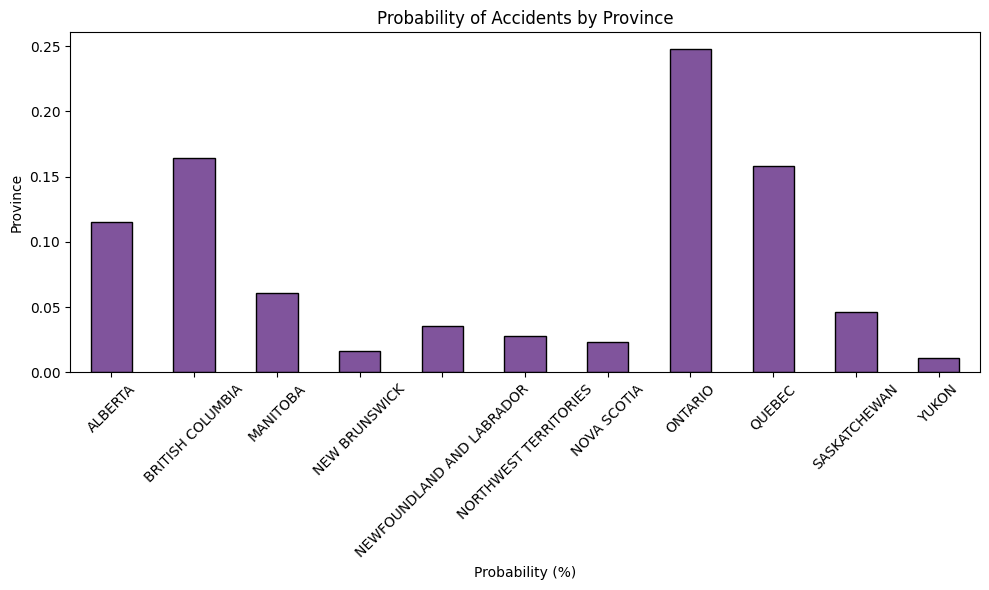

In [11]:
filtered_province_probabilities_df = getByProvince(province_probabilities)

In [12]:
filtered_province_probabilities_df.head(11)

,ProvinceID_DisplayEng,IncidentCount
0,ALBERTA,0.115404
1,BRITISH COLUMBIA,0.163897
2,MANITOBA,0.061009
3,NEW BRUNSWICK,0.016199
4,NEWFOUNDLAND AND LABRADOR,0.035475
5,NORTHWEST TERRITORIES,0.028003
6,NOVA SCOTIA,0.022897
7,ONTARIO,0.248158
8,QUEBEC,0.158497
9,SASKATCHEWAN,0.046484


#### Marginal probability of each damage level in a specific province.

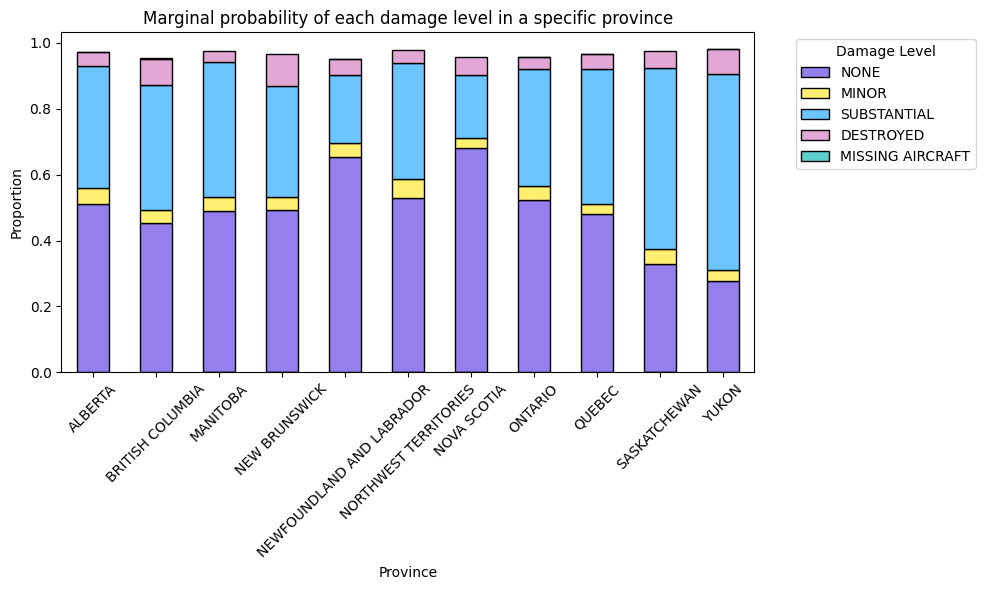

In [14]:
damage_levels_filtered = getByDamageLevelAndProvince(df)

In [15]:
damage_levels_filtered.head(11)

DamageLevelID_DisplayEng,NONE,MINOR,SUBSTANTIAL,DESTROYED,MISSING AIRCRAFT
ProvinceID_DisplayEng,,,,,
ALBERTA,0.509793,0.049329,0.370149,0.044070,0.000363
BRITISH COLUMBIA,0.453199,0.038309,0.379773,0.079811,0.003192
MANITOBA,0.490909,0.042882,0.408576,0.033962,0.000000
NEW BRUNSWICK,0.492248,0.041344,0.334625,0.098191,0.000000
NEWFOUNDLAND AND LABRADOR,0.652507,0.043658,0.206490,0.049558,0.000590
NORTHWEST TERRITORIES,0.528401,0.057549,0.352018,0.041854,0.000000
NOVA SCOTIA,0.680987,0.030165,0.192870,0.053931,0.000000
ONTARIO,0.522898,0.044025,0.354390,0.034916,0.000506
QUEBEC,0.481183,0.030635,0.407632,0.047141,0.000132


#### Marginal probability of each type of operation in a specific province

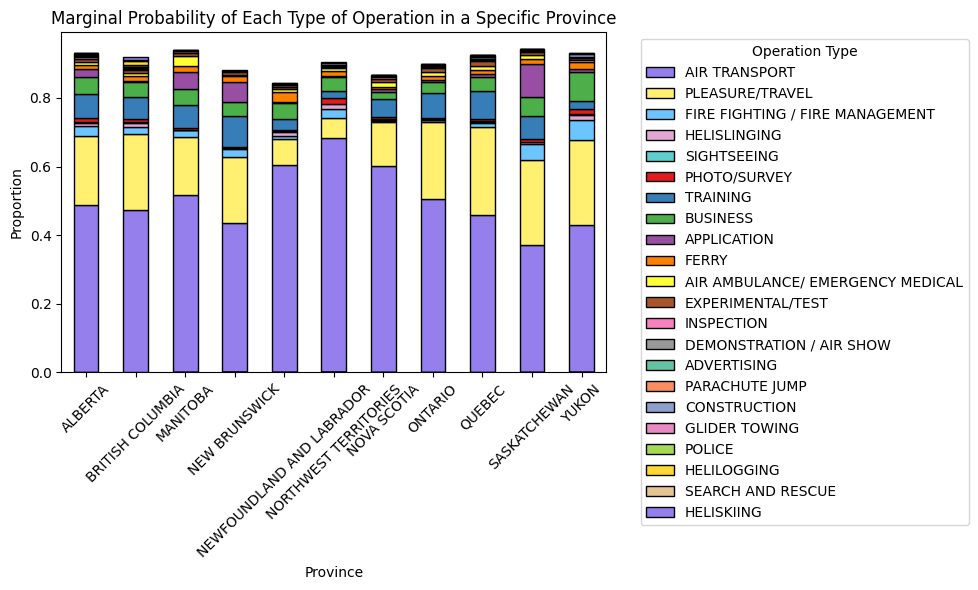

In [17]:
operation_types_filtered = getByOperationAndProvince(province_probabilities)

In [18]:
operation_types_filtered.head(11)

,AIR TRANSPORT,PLEASURE/TRAVEL,FIRE FIGHTING / FIRE MANAGEMENT,HELISLINGING,SIGHTSEEING,PHOTO/SURVEY,TRAINING,BUSINESS,APPLICATION,FERRY,...,INSPECTION,DEMONSTRATION / AIR SHOW,ADVERTISING,PARACHUTE JUMP,CONSTRUCTION,GLIDER TOWING,POLICE,HELILOGGING,SEARCH AND RESCUE,HELISKIING
ProvinceID_DisplayEng,,,,,,,,,,,,,,,,,,,,,
ALBERTA,0.487486,0.200218,0.031012,0.009068,0.002539,0.011063,0.071092,0.048966,0.022488,0.011970,...,0.007254,0.003627,0.002176,0.001451,0.001451,0.000907,0.000725,0.000363,0.000181,0.0000
BRITISH COLUMBIA,0.473630,0.220917,0.021964,0.011876,0.001915,0.008556,0.063977,0.042651,0.005236,0.013153,...,0.002682,0.001915,0.000894,0.002299,0.004597,0.000383,0.001405,0.012259,0.000638,0.0083
MANITOBA,0.516638,0.170497,0.018182,0.001715,0.001029,0.005146,0.066895,0.045283,0.050086,0.016467,...,0.003774,0.001029,0.000686,0.001372,0.001029,0.000686,0.000000,0.000000,0.000000,0.0000
NEW BRUNSWICK,0.436693,0.192506,0.023256,0.001292,0.001292,0.001292,0.090439,0.042636,0.058140,0.016796,...,0.000000,0.002584,0.001292,0.000000,0.000000,0.000000,0.002584,0.000000,0.000000,0.0000
NEWFOUNDLAND AND LABRADOR,0.604130,0.075516,0.008850,0.012979,0.001180,0.005310,0.029499,0.046608,0.003540,0.029499,...,0.004130,0.000590,0.001770,0.000000,0.002950,0.000000,0.000590,0.000000,0.001180,0.0000
NORTHWEST TERRITORIES,0.683109,0.059043,0.026158,0.012706,0.000000,0.019432,0.018685,0.042601,0.001495,0.014200,...,0.002990,0.000000,0.002990,0.000000,0.005979,0.000000,0.000747,0.000000,0.000000,0.0000
NOVA SCOTIA,0.601463,0.129799,0.000914,0.004570,0.000914,0.005484,0.053016,0.021938,0.009141,0.004570,...,0.005484,0.003656,0.000914,0.000914,0.000914,0.000914,0.000000,0.000000,0.000914,0.0000
ONTARIO,0.506368,0.222569,0.005988,0.002108,0.001687,0.003036,0.072109,0.032386,0.006663,0.012145,...,0.001181,0.002446,0.001434,0.002024,0.000759,0.001434,0.000590,0.000000,0.000084,0.0000
QUEBEC,0.458471,0.257890,0.009904,0.003565,0.002641,0.007131,0.080285,0.040011,0.009375,0.010828,...,0.003301,0.001188,0.005414,0.001849,0.002773,0.000924,0.000792,0.000132,0.000660,0.0000


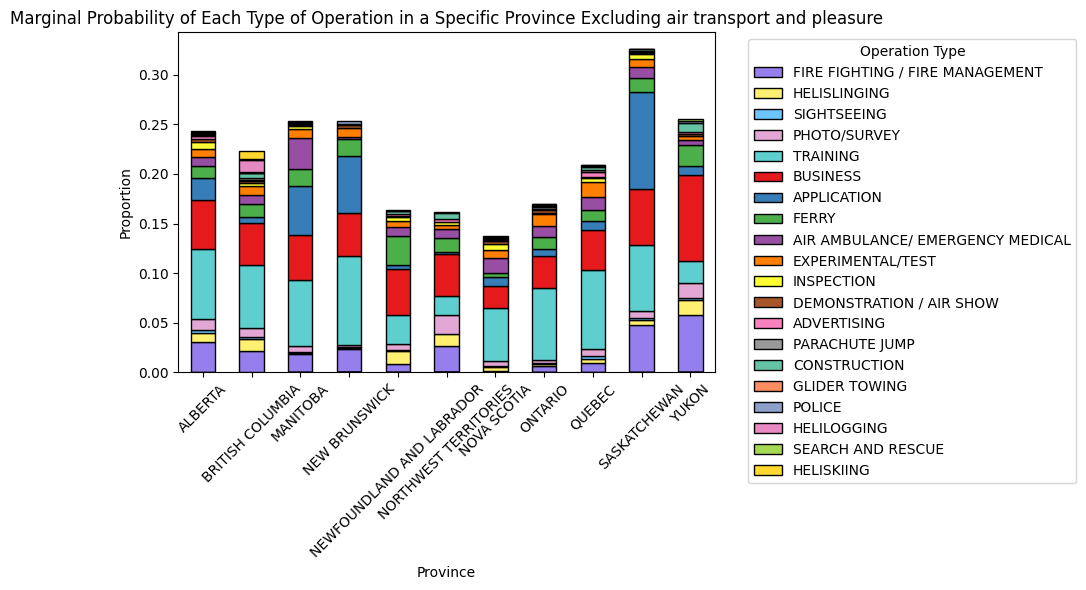

In [19]:
operation_types_filtered = getByOperationAndProvinceWithoutFirst2(province_probabilities)

In [20]:
operation_types_filtered.head(11)

,FIRE FIGHTING / FIRE MANAGEMENT,HELISLINGING,SIGHTSEEING,PHOTO/SURVEY,TRAINING,BUSINESS,APPLICATION,FERRY,AIR AMBULANCE/ EMERGENCY MEDICAL,EXPERIMENTAL/TEST,INSPECTION,DEMONSTRATION / AIR SHOW,ADVERTISING,PARACHUTE JUMP,CONSTRUCTION,GLIDER TOWING,POLICE,HELILOGGING,SEARCH AND RESCUE,HELISKIING
ProvinceID_DisplayEng,,,,,,,,,,,,,,,,,,,,
ALBERTA,0.031012,0.009068,0.002539,0.011063,0.071092,0.048966,0.022488,0.011970,0.008886,0.007617,0.007254,0.003627,0.002176,0.001451,0.001451,0.000907,0.000725,0.000363,0.000181,0.0000
BRITISH COLUMBIA,0.021964,0.011876,0.001915,0.008556,0.063977,0.042651,0.005236,0.013153,0.009705,0.009067,0.002682,0.001915,0.000894,0.002299,0.004597,0.000383,0.001405,0.012259,0.000638,0.0083
MANITOBA,0.018182,0.001715,0.001029,0.005146,0.066895,0.045283,0.050086,0.016467,0.031561,0.008576,0.003774,0.001029,0.000686,0.001372,0.001029,0.000686,0.000000,0.000000,0.000000,0.0000
NEW BRUNSWICK,0.023256,0.001292,0.001292,0.001292,0.090439,0.042636,0.058140,0.016796,0.002584,0.009044,0.000000,0.002584,0.001292,0.000000,0.000000,0.000000,0.002584,0.000000,0.000000,0.0000
NEWFOUNDLAND AND LABRADOR,0.008850,0.012979,0.001180,0.005310,0.029499,0.046608,0.003540,0.029499,0.009440,0.005900,0.004130,0.000590,0.001770,0.000000,0.002950,0.000000,0.000590,0.000000,0.001180,0.0000
NORTHWEST TERRITORIES,0.026158,0.012706,0.000000,0.019432,0.018685,0.042601,0.001495,0.014200,0.008969,0.004484,0.002990,0.000000,0.002990,0.000000,0.005979,0.000000,0.000747,0.000000,0.000000,0.0000
NOVA SCOTIA,0.000914,0.004570,0.000914,0.005484,0.053016,0.021938,0.009141,0.004570,0.014625,0.008227,0.005484,0.003656,0.000914,0.000914,0.000914,0.000914,0.000000,0.000000,0.000914,0.0000
ONTARIO,0.005988,0.002108,0.001687,0.003036,0.072109,0.032386,0.006663,0.012145,0.011301,0.012229,0.001181,0.002446,0.001434,0.002024,0.000759,0.001434,0.000590,0.000000,0.000084,0.0000
QUEBEC,0.009904,0.003565,0.002641,0.007131,0.080285,0.040011,0.009375,0.010828,0.013337,0.015186,0.003301,0.001188,0.005414,0.001849,0.002773,0.000924,0.000792,0.000132,0.000660,0.0000


#### Marginal probability of each type of operator type in a specific province

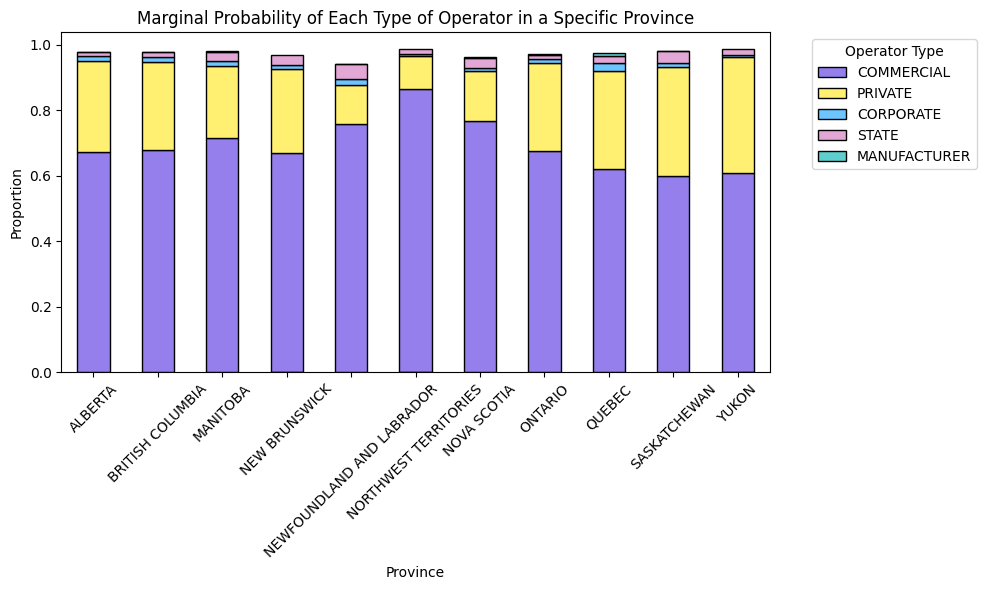

In [22]:
operator_types_filtered = getByOperatorAndProvince(province_probabilities)

In [23]:
operator_types_filtered.head(11)

,COMMERCIAL,PRIVATE,CORPORATE,STATE,MANUFACTURER
ProvinceID_DisplayEng,,,,,
ALBERTA,0.673377,0.276750,0.016503,0.011244,0.000907
BRITISH COLUMBIA,0.677819,0.270208,0.015835,0.013025,0.000511
MANITOBA,0.715609,0.220926,0.012693,0.029503,0.002058
NEW BRUNSWICK,0.669251,0.257106,0.011628,0.032300,0.000000
NEWFOUNDLAND AND LABRADOR,0.759292,0.117404,0.019469,0.044838,0.001770
NORTHWEST TERRITORIES,0.865471,0.101644,0.005979,0.012706,0.000000
NOVA SCOTIA,0.766910,0.151737,0.010969,0.029250,0.002742
ONTARIO,0.674707,0.268449,0.012229,0.014422,0.001602
QUEBEC,0.621418,0.297636,0.024033,0.024033,0.009111


#### Marginal probability of each aircraft type in a specific province

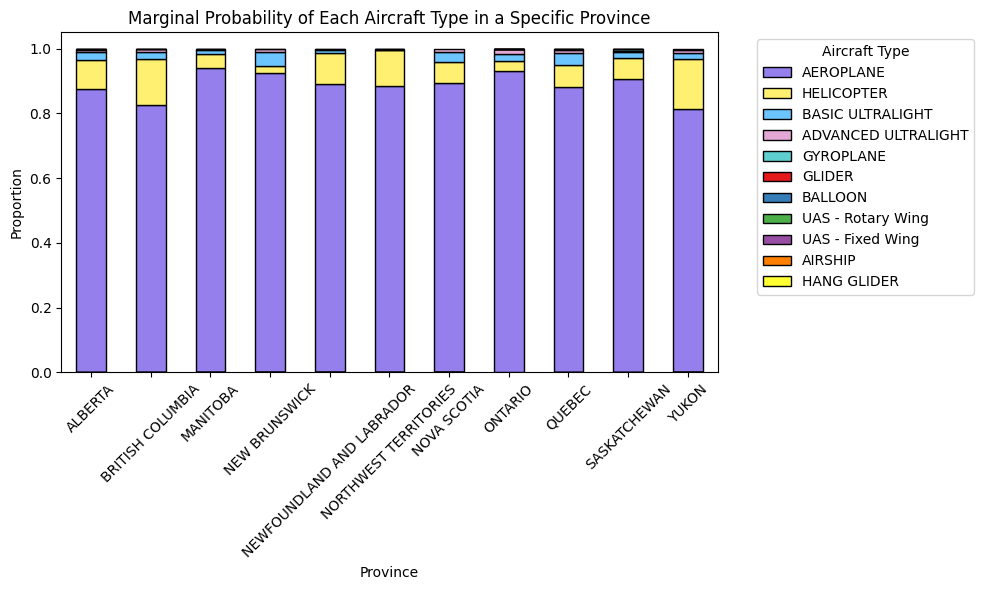

In [25]:
aircraft_types_filtered = getByAircraftAndProvince(province_probabilities)

In [26]:
aircraft_types_filtered.head(11)

,AEROPLANE,HELICOPTER,BASIC ULTRALIGHT,ADVANCED ULTRALIGHT,GYROPLANE,GLIDER,BALLOON,UAS - Rotary Wing,UAS - Fixed Wing,AIRSHIP,HANG GLIDER
ProvinceID_DisplayEng,,,,,,,,,,,
ALBERTA,0.875408,0.089590,0.025390,0.005985,0.002176,0.000544,0.000544,0.000181,0.000000,0.000000,0.000000
BRITISH COLUMBIA,0.825948,0.142255,0.021964,0.007917,0.000638,0.001022,0.000128,0.000000,0.000000,0.000000,0.000000
MANITOBA,0.940995,0.040823,0.012693,0.003774,0.001372,0.000000,0.000343,0.000000,0.000000,0.000000,0.000000
NEW BRUNSWICK,0.923773,0.021964,0.042636,0.010336,0.001292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NEWFOUNDLAND AND LABRADOR,0.889676,0.097935,0.008260,0.003540,0.000590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NORTHWEST TERRITORIES,0.884903,0.110613,0.000747,0.000747,0.002242,0.000000,0.000000,0.000747,0.000000,0.000000,0.000000
NOVA SCOTIA,0.893967,0.065814,0.029250,0.010969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ONTARIO,0.929662,0.030446,0.024121,0.012904,0.001265,0.000422,0.000506,0.000253,0.000169,0.000169,0.000084
QUEBEC,0.881685,0.068401,0.034597,0.011488,0.002245,0.000528,0.000528,0.000396,0.000000,0.000000,0.000000


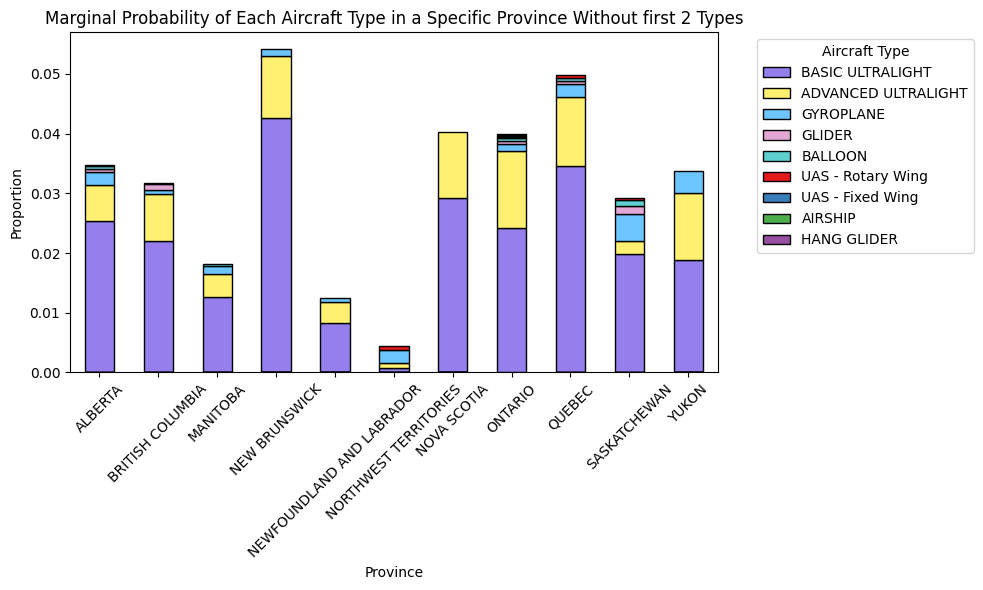

In [27]:
aircraft_types_filtered = getByAircraftAndProvinceWithoutFirst2(aircraft_types_filtered)

#### Marginal probability of each type of injury in a specific province.

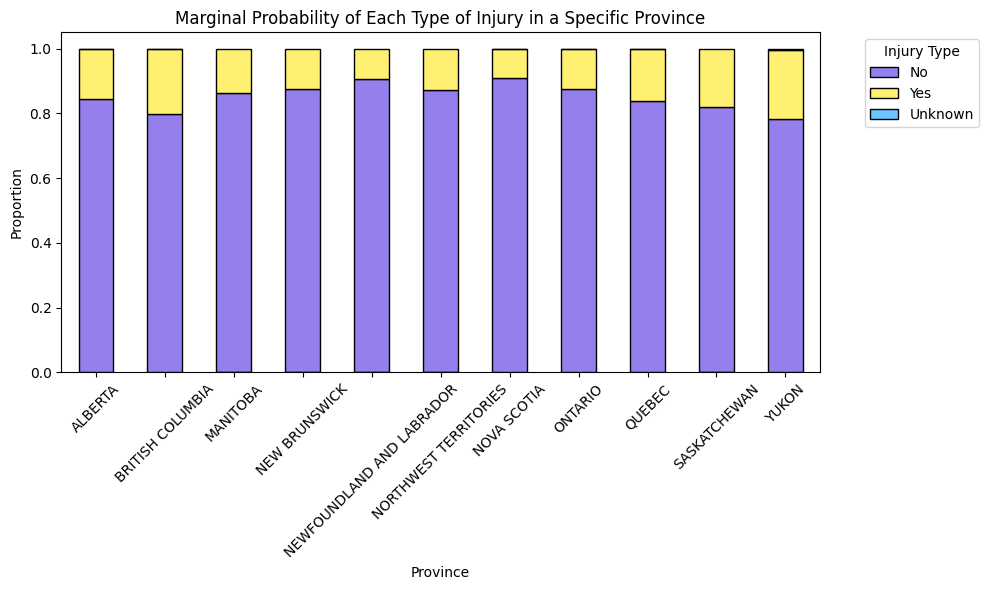

In [29]:
injuries_types_filtered = getByInjuriesAndProvince(province_probabilities)

In [30]:
injuries_types_filtered.head(11)

,No,Yes,Unknown
ProvinceID_DisplayEng,,,
ALBERTA,0.844759,0.155060,0.000181
BRITISH COLUMBIA,0.796705,0.200996,0.002299
MANITOBA,0.862779,0.137221,0.000000
NEW BRUNSWICK,0.874677,0.125323,0.000000
NEWFOUNDLAND AND LABRADOR,0.906195,0.093805,0.000000
NORTHWEST TERRITORIES,0.870703,0.129297,0.000000
NOVA SCOTIA,0.908592,0.090494,0.000914
ONTARIO,0.873577,0.126339,0.000084
QUEBEC,0.839165,0.160702,0.000132


#### Average age of aircraft involved in incidents in a specific province.

In [32]:
from analysis.exploratory_analysis.average_aircraft_age import plotAverageAircraftAge

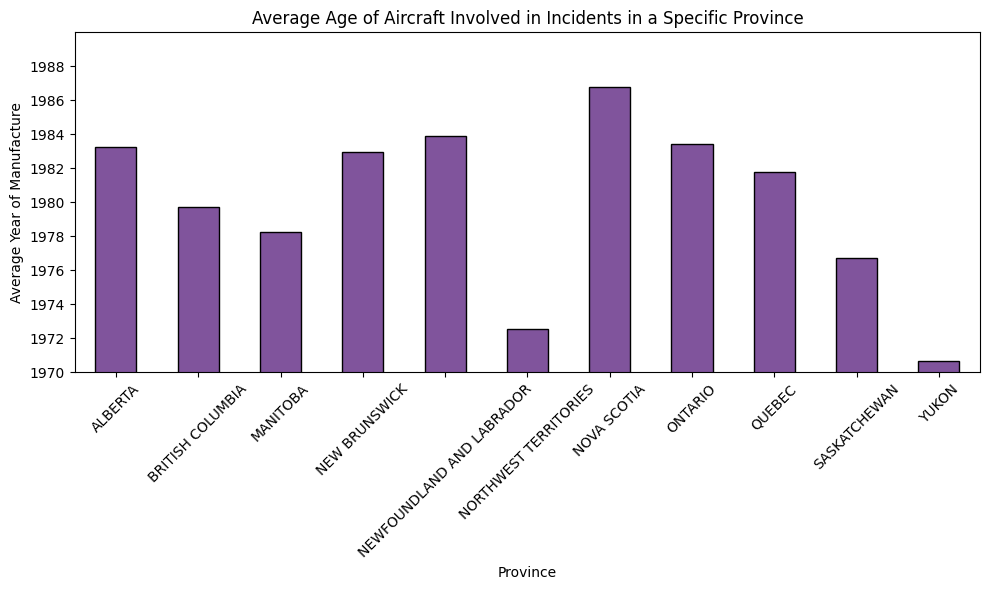

In [33]:
aircraft_age_filtered_df = plotAverageAircraftAge(province_probabilities)

In [34]:
aircraft_age_filtered_df.head(11)

,ProvinceID_DisplayEng,YearOfManuf
0,ALBERTA,1983.229416
1,BRITISH COLUMBIA,1979.752905
2,MANITOBA,1978.250086
3,NEW BRUNSWICK,1982.985788
4,NEWFOUNDLAND AND LABRADOR,1983.882006
5,NORTHWEST TERRITORIES,1972.576981
6,NOVA SCOTIA,1986.778793
7,ONTARIO,1983.428692
8,QUEBEC,1981.783573
9,SASKATCHEWAN,1976.752814


### Conditional probabilities 

In [36]:
import seaborn as sns

In [37]:
from analysis.exploratory_analysis.conditional_probabilities.conditional_probabilities_functions import (
    getEngineVSDamege, 
    getOperatorVSDamage, 
    getTop10ManufacturersVSDamage, 
    getTop10ManufacturersVSInjuries, 
    getTop10CommercialOrganizationsVSDamage
)

#### Conditional Probability: Number of Engines vs Damage Level

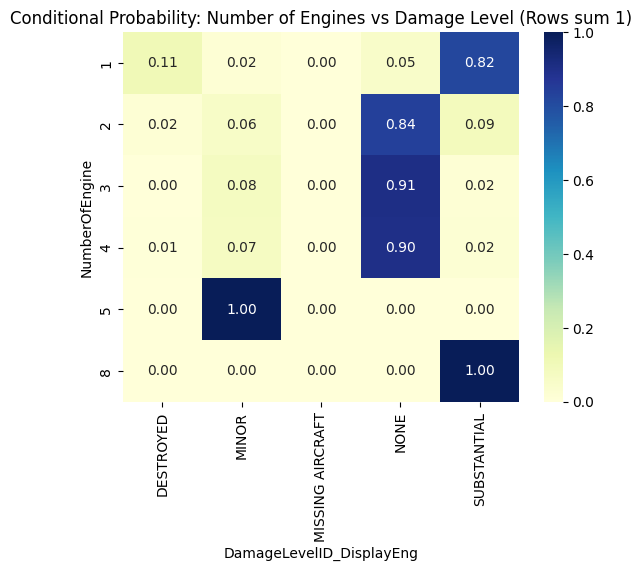

In [39]:
getEngineVSDamege(df)

####  Conditional Probability: OperatorType vs Damage Level

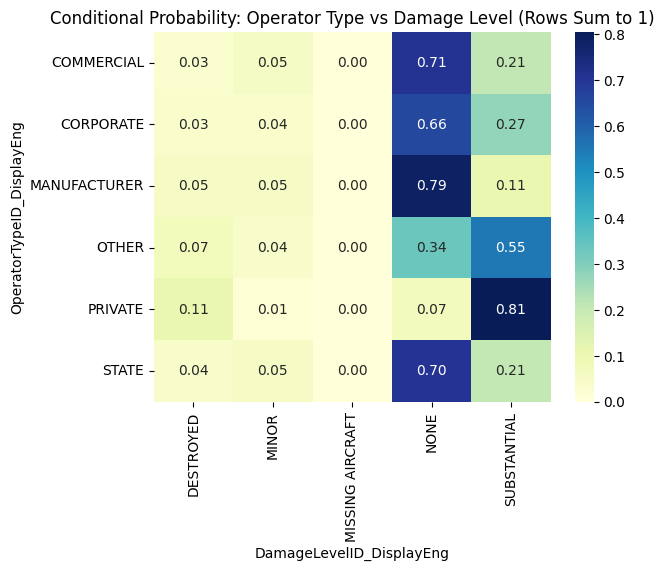

In [41]:
getOperatorVSDamage(df)

#### Conditional Probability: Top 10 Aircraft Makes vs Damage Level

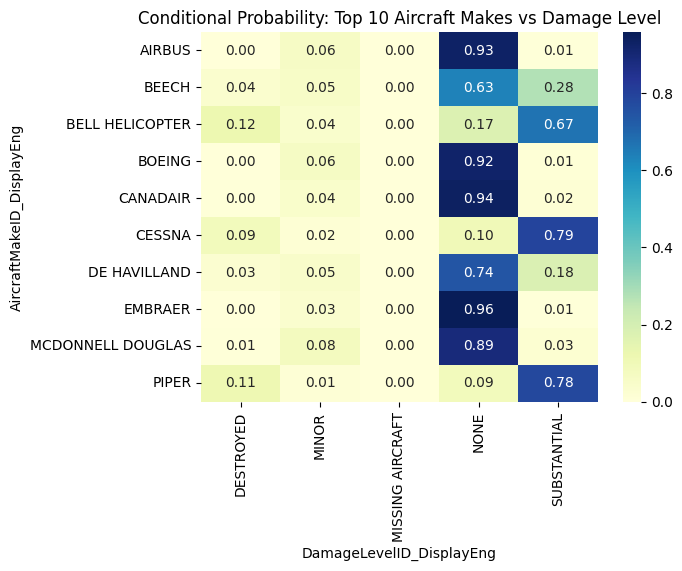

In [43]:
getTop10ManufacturersVSDamage(df)

#### Conditional Probability: Top 10 Aircraft Makes vs Injuries

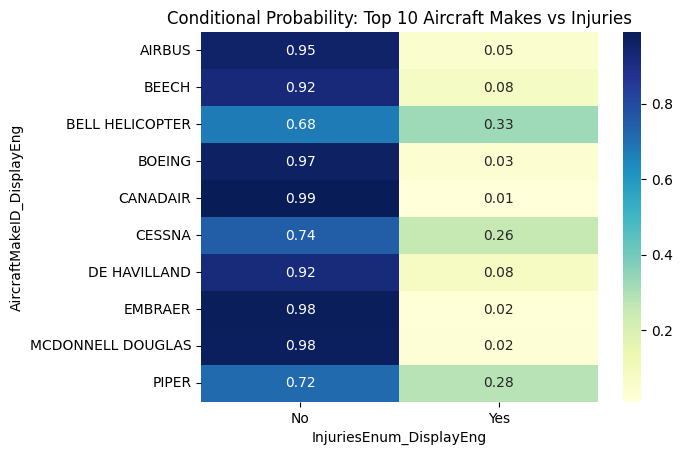

In [45]:
getTop10ManufacturersVSInjuries(df)

#### Conditional Probability: Top 10 Commertial organizations vs Damage Level

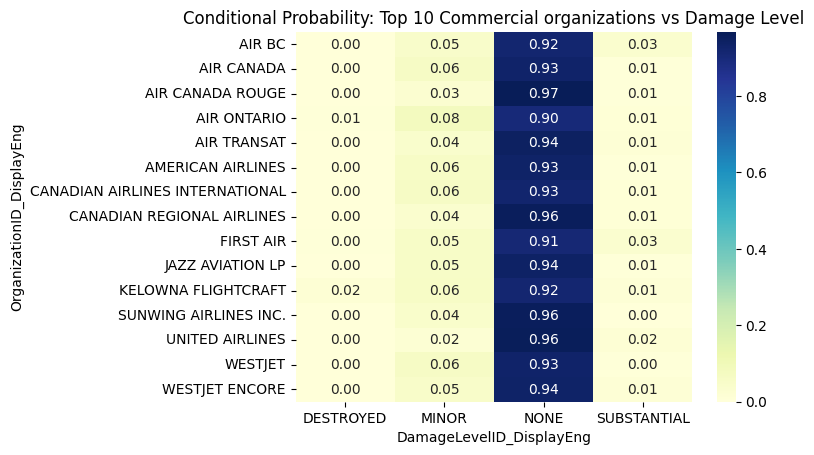

In [47]:
getTop10CommercialOrganizationsVSDamage(df)

### Binomial probability to analyze injuries

In [49]:
from scipy.stats import binom
from scipy.special import gammaln

In [71]:
from analysis.exploratory_analysis.binomial_probability_injuries  import getBinomialProbabilityForInjuries

We can find the probabilities
$f(x) = \binom{n}{x} p^x (1 - p)^{n - x}$ , 
$\binom{n}{x} = \frac{n!}{x! (n - x)!}$

##### Probability 0 of 10 occurrences have injuries:
$ f(0) = \binom{10}{0} p^0 (1 - p)^{10 - 0} $

##### Probability 2 of 10 occurrences have injuries:
$ f(2) = \binom{10}{2} p^{2} (1 - p)^{10 - 2} $

**...**
##### Probability 10 of 10 occurrences have injuries:
$f(10) = \binom{10}{10} p^{10} (1 - p)^{10 - 10}$


Number of injuries: 6988
Injuries probability: 0.14625060170360604
Total number of occurrences: 47781
Probability of 0 injuries in 10 occurrences: 0.2057330697
Probability of 1 injuries in 10 occurrences: 0.3524287723
Probability of 2 injuries in 10 occurrences: 0.2716759045
Probability of 3 injuries in 10 occurrences: 0.1241043788
Probability of 4 injuries in 10 occurrences: 0.03720423719
Probability of 5 injuries in 10 occurrences: 0.007647877121
Probability of 6 injuries in 10 occurrences: 0.001091759316
Probability of 7 injuries in 10 occurrences: 0.0001068700736
Probability of 8 injuries in 10 occurrences: 6.865222659e-06
Probability of 9 injuries in 10 occurrences: 2.613420927e-07
Probability of 10 injuries in 10 occurrences: 4.476891976e-09


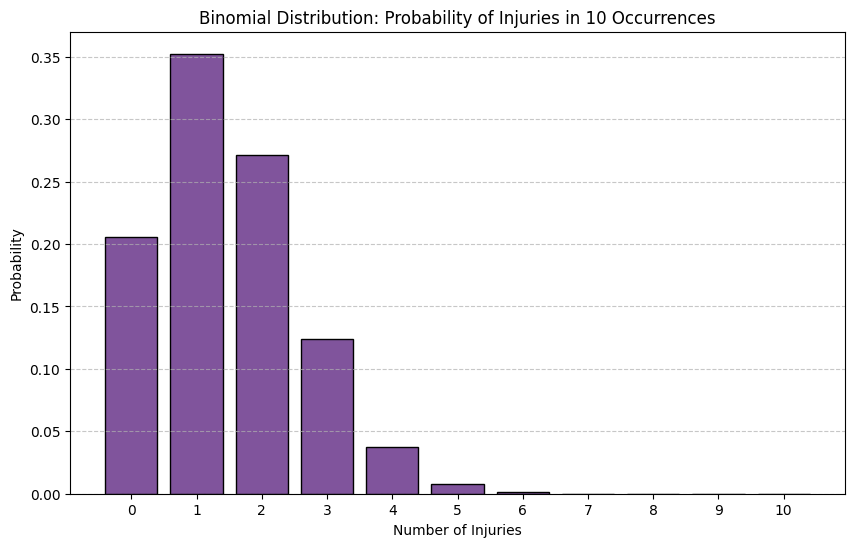

In [73]:
getBinomialProbabilityForInjuries(df)

### Finding the Distribution of Aircraft Age

In [107]:
from analysis.exploratory_analysis.aircraft_age_distribution import plotingDistributions

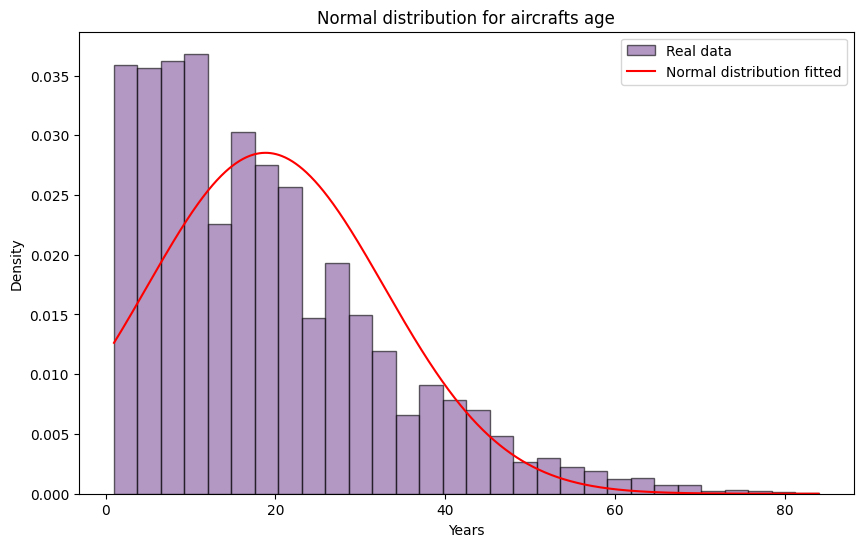

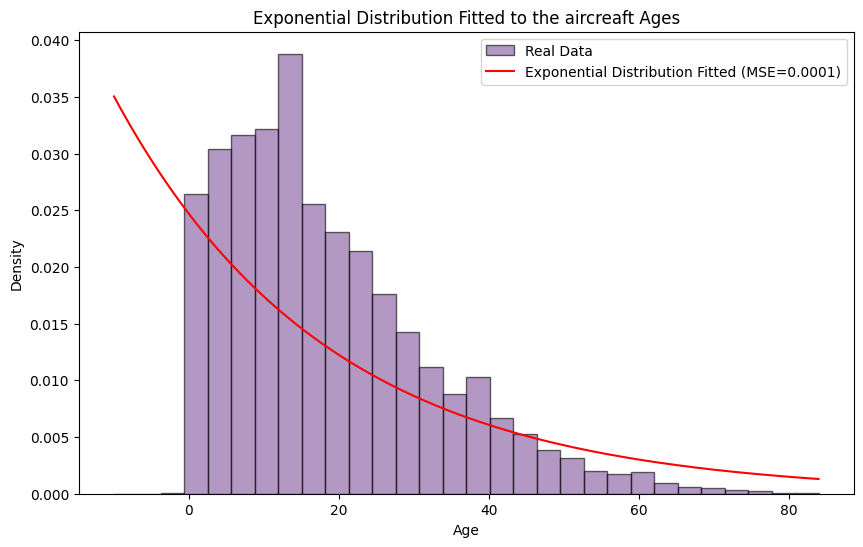

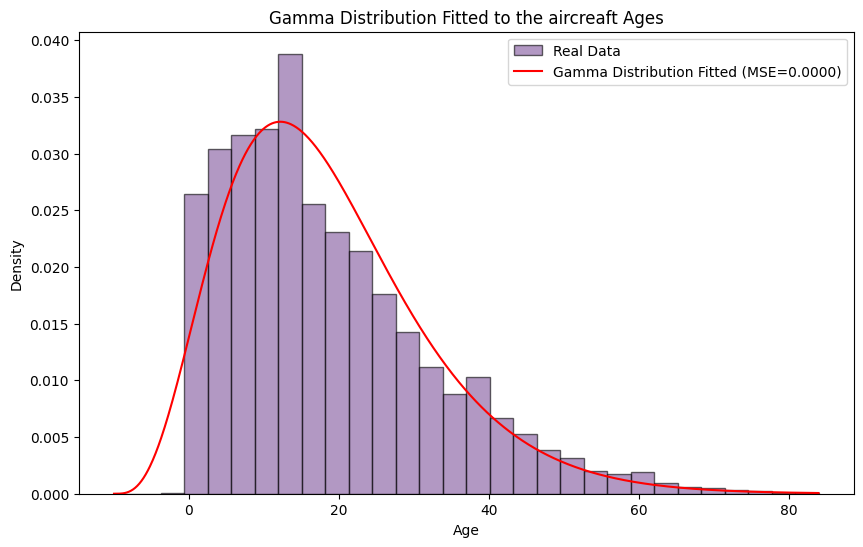

C:\Users\camii\Documents\U\Term 1\Term 1\Data Analytics\Project\Airplane_Accidents_Analytics\venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6617: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


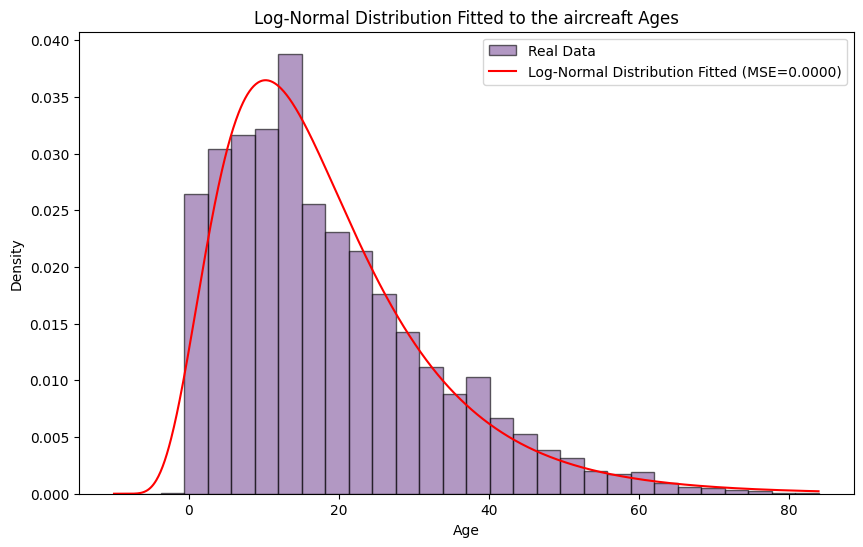

C:\Users\camii\Documents\U\Term 1\Term 1\Data Analytics\Project\Airplane_Accidents_Analytics\venv\Lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


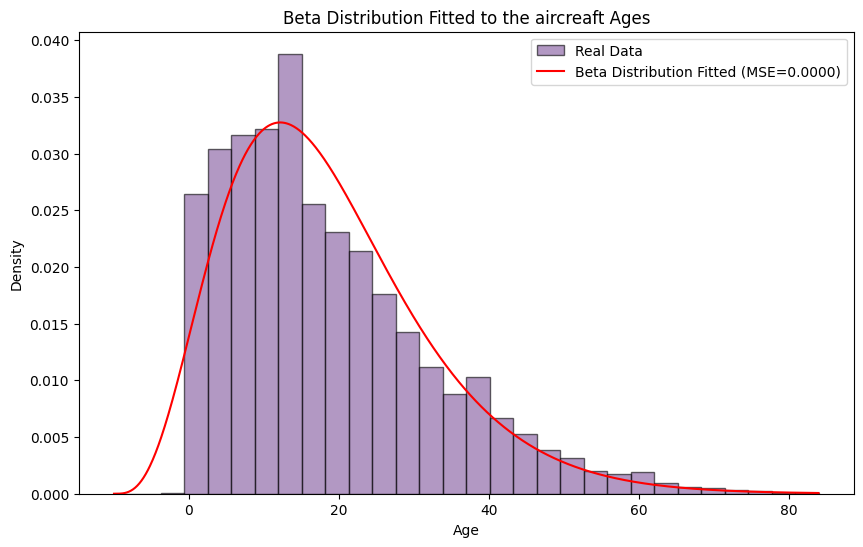

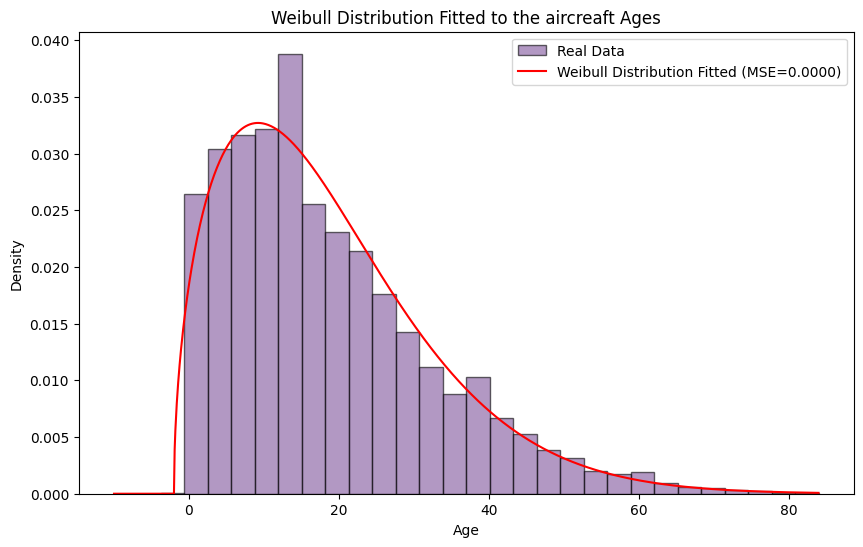

Best fit: Weibull Distribution
Params: (1.515455021262854, -2.0016440904961446, 22.84866655814801)


In [118]:
results_df = plotingDistributions(df)

In [119]:
results_df.head()

,Exponential Distribution,Gamma Distribution,Log-Normal Distribution,Beta Distribution,Weibull Distribution
params,"(-10.0, 28.536740545405078)","(4.499897371462815, -10.020309578059553, 6.346...","(0.47722409217924244, -10.22654655758025, 25.6...","(4.481017295309705, 72022.8615749996, -10.0197...","(1.515455021262854, -2.0016440904961446, 22.84..."
mse,0.00014,0.000011,0.000008,0.000011,0.000004


#### Variance and Standard Deviation of Manufacturing Years

In [ ]:
variance = df['YearOfManuf'].var()
std_dev = df['YearOfManuf'].std()
print(f"Variance: {variance}, Standard Deviation: {std_dev}")

#### Distribution of Incident Times

In [126]:
from analysis.exploratory_analysis.times_distribution import plotDistributions

Best fitting distribution: Normal
Mean Squared Errors (MSE) for distributions:
Uniform: 0.000000
Normal: 0.000000
Exponential: 0.000000
Gamma: 0.000000
Weibull: 0.000000


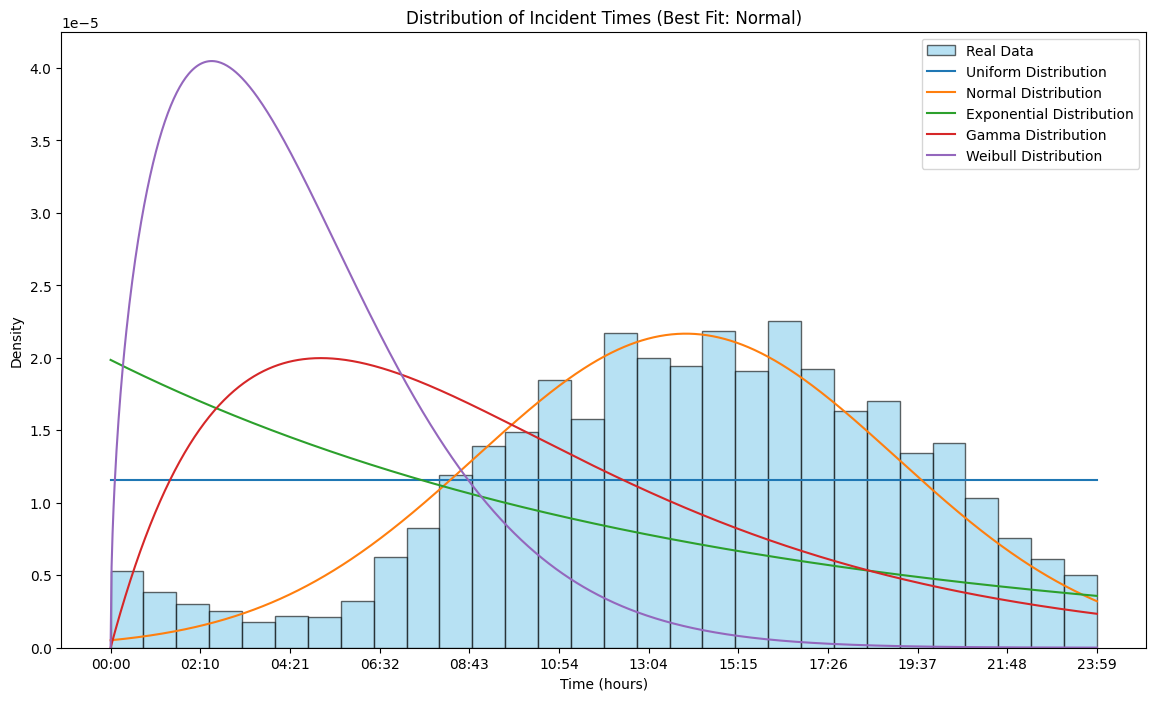

In [128]:
plotDistributions(df)

## Expected Values

In [179]:
from analysis.exploratory_analysis.expected_values.expected_values_functions import(
getDamageByWeight, 
getAircraftAgeByOperation, 
getInjuriesByAircraft, 
getDamageByOperator,
gettDamageByProvince
)

#### Expected Damage Level by Aircraft Weight

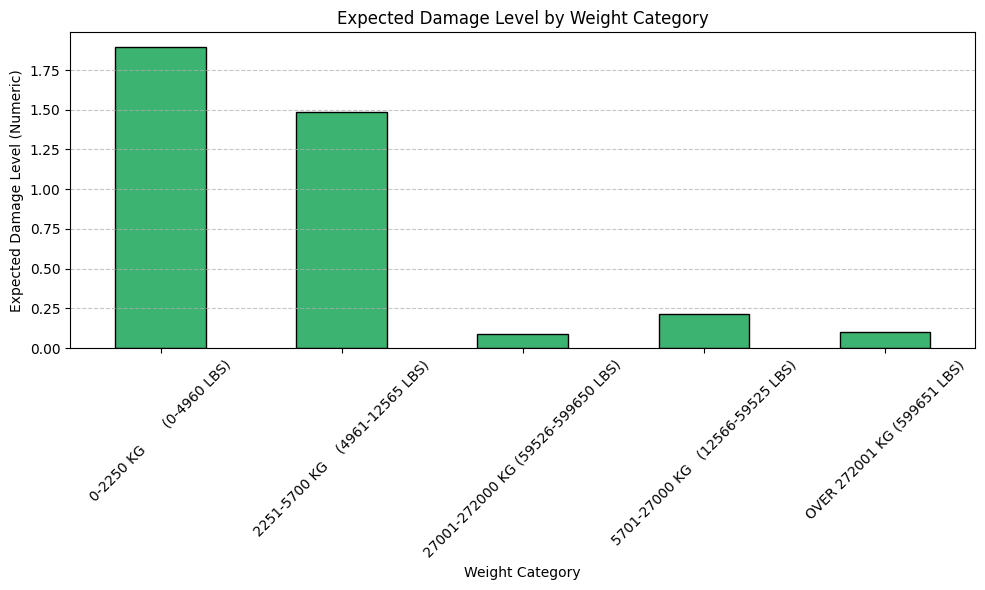

In [147]:
getDamageByWeight(df)

#### Expected Aircraft Age by Operation Type

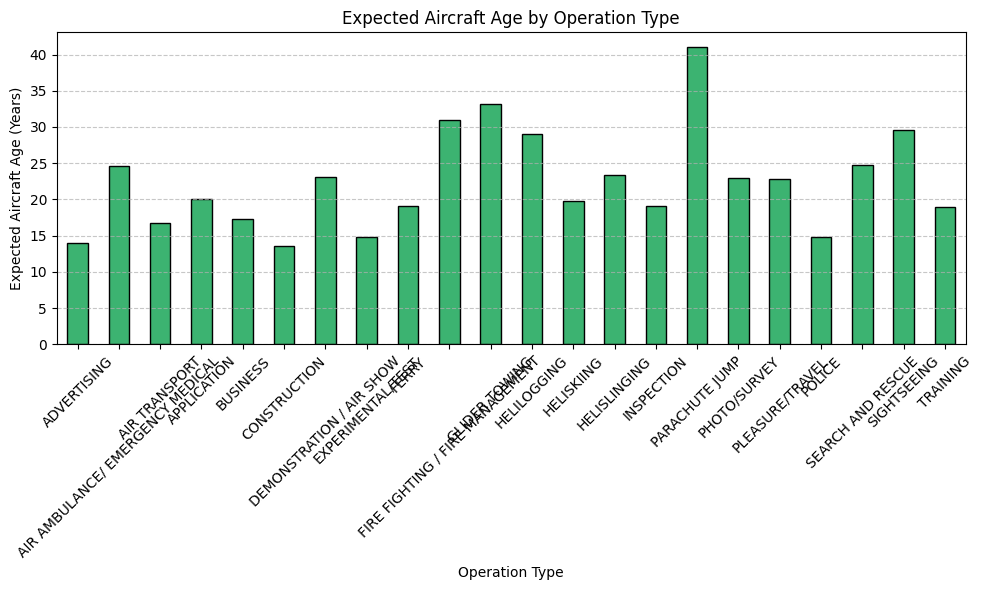

In [157]:
getAircraftAgeByOperation(df)

####  Expected Number of Injuries by Aircraft Type

AircraftTypeID_DisplayEng
ADVANCED ULTRALIGHT    0.388175
AEROPLANE              0.122641
AIRSHIP                0.500000
BALLOON                0.823529
BASIC ULTRALIGHT       0.558454
GLIDER                 0.458333
GYROPLANE              0.436620
HANG GLIDER            1.000000
HELICOPTER             0.279976
UAS - Fixed Wing       0.000000
UAS - Rotary Wing      0.111111
Name: InjuryNumeric, dtype: float64


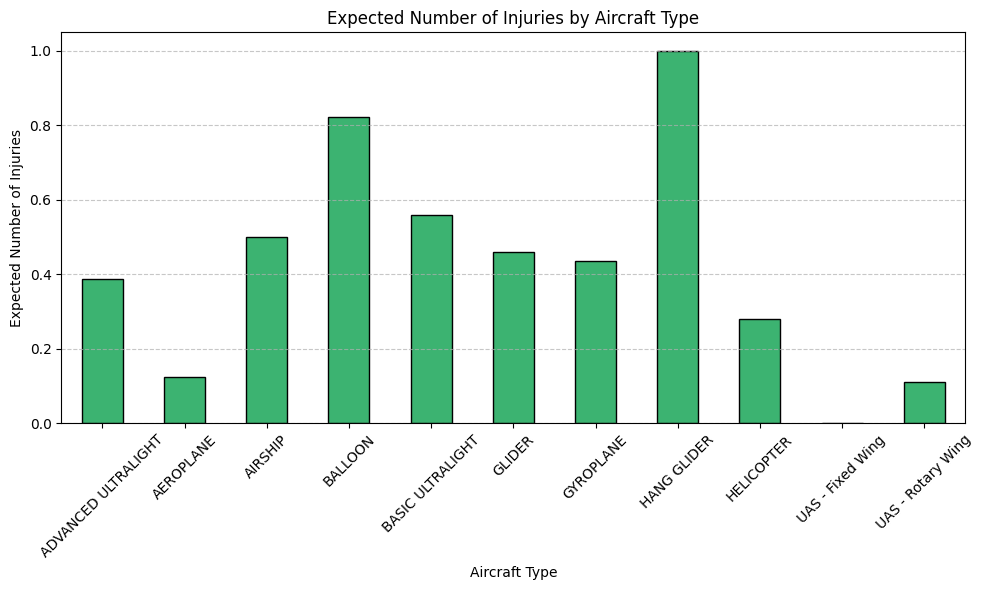

In [161]:
getInjuriesByAircraft(df)

#### Expected Damage Level by Operator Type

OperatorTypeID_DisplayEng
COMMERCIAL      0.487933
CORPORATE       0.605926
MANUFACTURER    0.288288
PRIVATE         1.827970
STATE           0.483061
Name: DamageLevelNumeric, dtype: float64


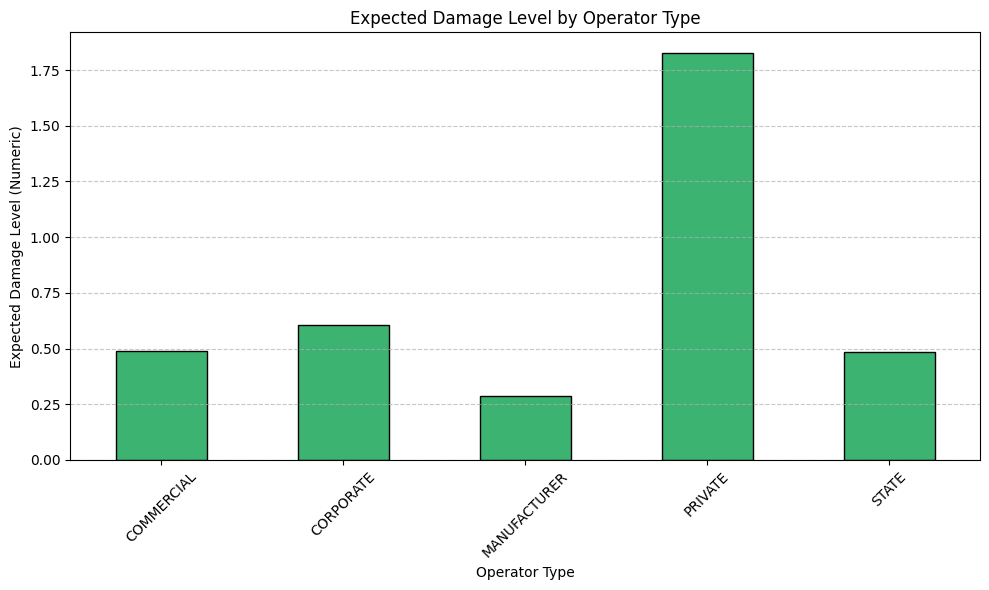

In [169]:
getDamageByOperator(df)

ProvinceID_DisplayEng
ALBERTA                      0.849727
BRITISH COLUMBIA             0.915726
MANITOBA                     0.912632
NEW BRUNSWICK                0.818452
NEWFOUNDLAND AND LABRADOR    0.505882
NORTHWEST TERRITORIES        0.811952
NOVA SCOTIA                  0.460061
ONTARIO                      0.817100
QUEBEC                       0.920006
SASKATCHEWAN                 1.238420
YUKON                        1.348548
Name: DamageLevelNumeric, dtype: float64


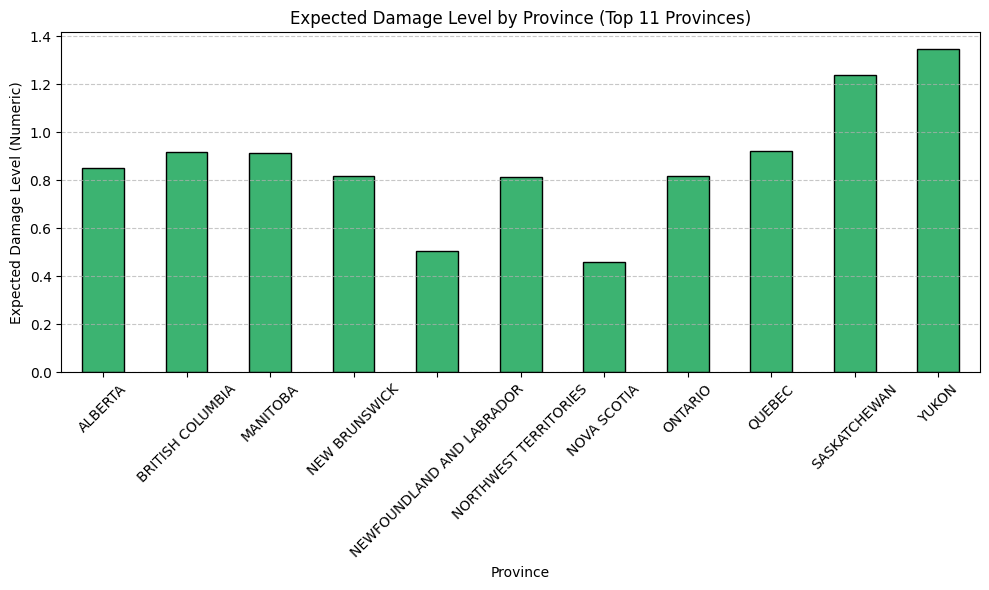

In [181]:
gettDamageByProvince(df)

### Correlations and dependencies 

In [185]:
from analysis.exploratory_analysis.correlations import plotCorrelationMatrix

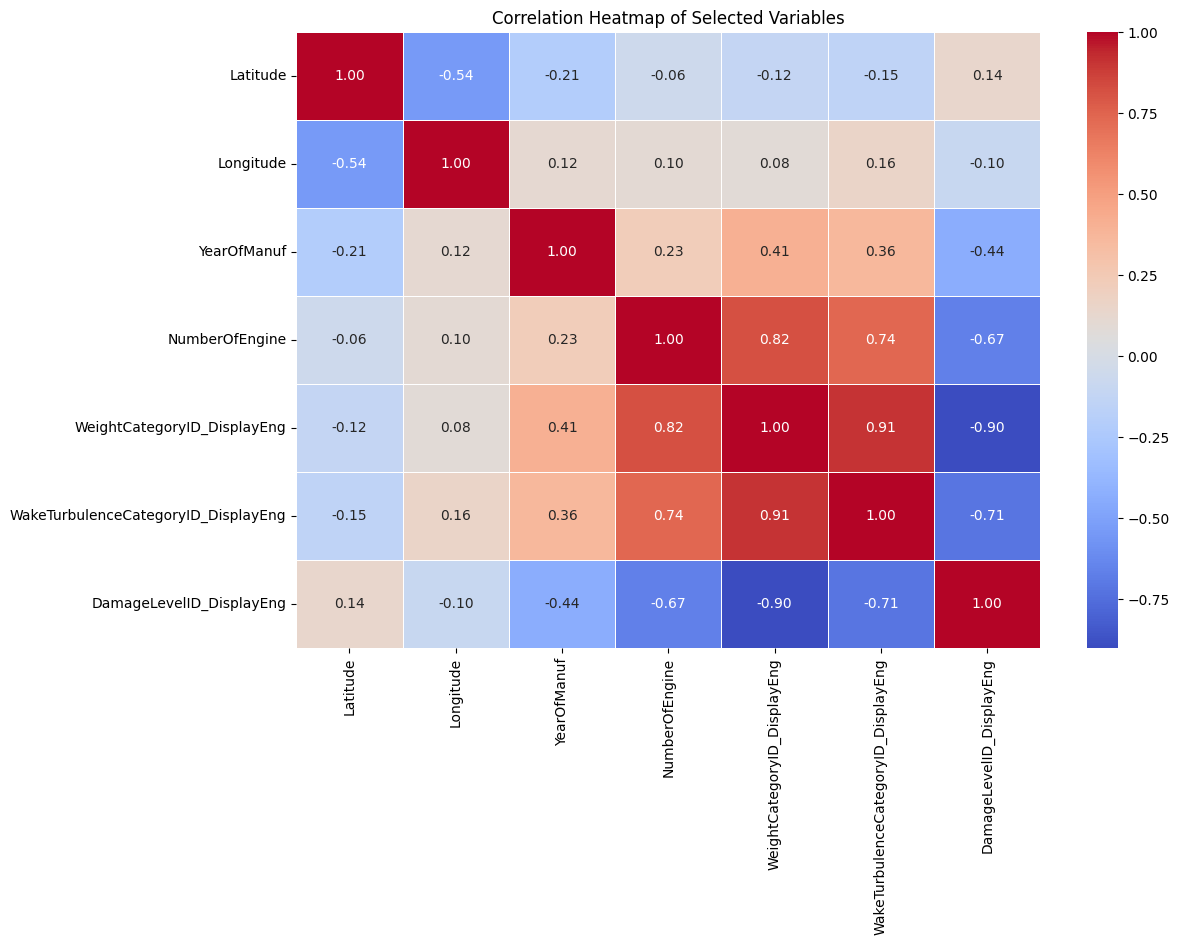

In [187]:
plotCorrelationMatrix(df)